# **<h3 align="center">Machine Learning - Project</h3>**
**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

## Table of Contents
* [Import the libraries](#chapter1)
* [Train dataset](#chapter2)
    * [Import the dataset](#section_2_1)
    * [Data explore](#section_2_2)
    * [Feature's classification](#section_2_3)  
    * [Visualization](#section_2_4)  
* [Test dataset](#chapter3)
    * [Import the dataset](#section_3_1)
    * [Data explore](#section_2_2)
* [Feature Selection](#chapter4)
    * [1. Selecting Numeric Features](#section_4_1)
        * [Scale the data](#sub_section_4_1_1)
        * [Spearman and Pearson correlation matrix](#sub_section_4_1_2)
        * [LASSO Regression](#sub_section_4_1_3)
        * [Recursive Feature Elimination - RFE](#sub_section_4_1_4)
    * [2. Selecting Categorical Features](#section_4_2) 
        * [$\chi ^2$ Test for Independence](#sub_section_4_2_1)
        * [Mutual Information Criterion](#sub_section_4_2_2)
        * [Intersection of the features chosen by both this models](#sub_section_4_2_3)
    * [3. Final Features](#section_4_3) 
* [Random Forest Classifier](#chapter5) 
    * [Grid Search for hyperparameters](#section_5_1)
    * [Final model](#section_5_2) 
* [Import the submission file](#chapter6)




# Import the libraries<a class="anchor" id="chapter1"></a>

In [1]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#feature selection
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency


from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

from tqdm.notebook import tqdm


#  **<h3 align="center">Train dataset </h3>** <a class="anchor" id="chapter2"></a>

## Import the dataset <a class="anchor" id="section_2_1"></a>

In [3]:
data_train_original = pd.read_csv('train.csv')
data_train_original.head(3)

,BookingID,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
0,10423,2016,3,13,21,18.0,1,2,2,0.0,...,1,6,3,85.0,84.15,0.0,40141.59,40833.24,0.898,0
1,14038,2016,4,17,23,16.0,2,4,2,2.0,...,1,1,1,206.0,203.94,0.0,7199.25,7096.60,0.572,1
2,37179,2016,12,53,28,16.0,0,1,2,0.0,...,1,6,6,138.0,136.62,0.0,28742.44,29668.86,0.842,1


In [4]:
data_train=data_train_original.copy()

In [5]:
data_train.set_index(['BookingID'], inplace = True)

## Data explore <a class="anchor" id="section_2_2"></a>

The <span style='color:Blue'> info()  </span> method prints information about the dataframe. Using this method we can also see that there aren't any missing values, and check the data types. <BR>
Analysing the data types we consider that the feature _Children_ must be an integer instead of float.

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13938 entries, 10423 to 24861
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ArrivalYear                             13938 non-null  int64  
 1   ArrivalMonth                            13938 non-null  int64  
 2   ArrivalWeekNumber                       13938 non-null  int64  
 3   ArrivalDayOfMonth                       13938 non-null  int64  
 4   ArrivalHour                             13938 non-null  float64
 5   WeekendStays                            13938 non-null  int64  
 6   WeekdayStays                            13938 non-null  int64  
 7   Adults                                  13938 non-null  int64  
 8   Children                                13938 non-null  float64
 9   Babies                                  13938 non-null  int64  
 10  FirstTimeGuest                          13938 non-null

In [7]:
data_train['Children']=data_train['Children'].astype('int64')

Check if exists any variable that has missing values - after running the command we can conclude that there are no missing values.


In [8]:
data_train.isnull().sum()

ArrivalYear                               0
ArrivalMonth                              0
ArrivalWeekNumber                         0
ArrivalDayOfMonth                         0
ArrivalHour                               0
WeekendStays                              0
WeekdayStays                              0
Adults                                    0
Children                                  0
Babies                                    0
FirstTimeGuest                            0
AffiliatedCustomer                        0
PreviousReservations                      0
PreviousStays                             0
PreviousCancellations                     0
DaysUntilConfirmation                     0
OnlineReservation                         0
BookingChanges                            0
BookingToArrivalDays                      0
ParkingSpacesBooked                       0
SpecialRequests                           0
PartOfGroup                               0
CompanyReservation              

The <span style='color:Blue'> shape() </span> method is used to check how many rows and columns our dataset has at the beginning.

In [9]:
data_train.shape

(13938, 33)

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [10]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ArrivalYear,13938.0,2016.000000,0.000000,2016.000,2016.000000,2016.000,2016.000,2016.000
ArrivalMonth,13938.0,6.854498,3.175421,1.000,4.000000,7.000,10.000,12.000
ArrivalWeekNumber,13938.0,28.851413,13.901656,1.000,17.000000,29.000,41.000,53.000
ArrivalDayOfMonth,13938.0,15.888148,8.850454,1.000,8.000000,16.000,24.000,31.000
ArrivalHour,13938.0,18.874121,2.884563,14.000,16.250000,19.000,21.250,23.750
WeekendStays,13938.0,0.882695,0.945422,0.000,0.000000,1.000,2.000,14.000
WeekdayStays,13938.0,2.292510,1.735639,0.000,1.000000,2.000,3.000,35.000
Adults,13938.0,1.885852,0.547217,0.000,2.000000,2.000,2.000,4.000
Children,13938.0,0.141627,0.452717,0.000,0.000000,0.000,0.000,3.000
Babies,13938.0,0.006959,0.116244,0.000,0.000000,0.000,0.000,10.000


> From this statistical table, we can retrieve the frequency, mean, standard deviation, minimum and maximum values, and the three quartile values (25%, 50% = median, and 75%). By generally looking at the table we can analyze that the median and mean values are similar in most of the features, with this we conclude that most of the features appear to have a representative mean in this population. We can also check the number of rows for each feature in the count.

The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). <br>
The feature _ArrivalYear_ and _CompanyReservation_ are univariate so we remove those variables from the dataset.

In [11]:
data_train.var()

ArrivalYear                               0.000000e+00
ArrivalMonth                              1.008330e+01
ArrivalWeekNumber                         1.932560e+02
ArrivalDayOfMonth                         7.833053e+01
ArrivalHour                               8.320704e+00
WeekendStays                              8.938226e-01
WeekdayStays                              3.012444e+00
Adults                                    2.994468e-01
Children                                  2.049529e-01
Babies                                    1.351259e-02
FirstTimeGuest                            2.659003e-02
AffiliatedCustomer                        4.997377e-03
PreviousReservations                      4.323033e+00
PreviousStays                             3.454721e+00
PreviousCancellations                     1.724692e-01
DaysUntilConfirmation                     7.718722e+01
OnlineReservation                         8.892550e-02
BookingChanges                            5.356698e-01
BookingToA

In [12]:
data_train=data_train.drop(['ArrivalYear','CompanyReservation'],axis=1)

## Feature's classification <a class="anchor" id="section_2_3"></a>

The following code shows that we are simply creating new variables to facilitate the extraction of information for/from each, which are organized as: <br>
- **features_categorical** (only categorical  features stored); <br>
- **features_numerical** (only numerical features stored); <br>
- **features_discrete** (only discrete features); <br>
- **features_continuous** (only continuous features). <br>

In [13]:
features_categorical=['FirstTimeGuest', 'AffiliatedCustomer','OnlineReservation','PartOfGroup']
features_numerical=[ 'ArrivalMonth', 'ArrivalWeekNumber', 'ArrivalDayOfMonth',
       'ArrivalHour', 'WeekendStays', 'WeekdayStays', 'Adults', 'Children',
       'Babies','PreviousReservations', 'PreviousStays', 'PreviousCancellations',
       'DaysUntilConfirmation', 'BookingChanges',
       'BookingToArrivalDays', 'ParkingSpacesBooked', 'SpecialRequests', 'OrderedMealsPerDay',
       'FloorReserved', 'FloorAssigned', 'DailyRateEuros', 'DailyRateUSD',
       '%PaidinAdvance', 'CountryofOriginAvgIncomeEuros (Year-2)',
       'CountryofOriginAvgIncomeEuros (Year-1)', 'CountryofOriginHDI (Year-1)']
features_discrete=['ArrivalMonth', 'ArrivalWeekNumber', 'ArrivalDayOfMonth','Adults', 'Children',
       'Babies', 'PreviousReservations', 'PreviousStays', 'PreviousCancellations', 'DaysUntilConfirmation', 'WeekendStays', 
                   'WeekdayStays', 'BookingToArrivalDays', 'ParkingSpacesBooked', 'SpecialRequests', 'BookingChanges', 
                  'OrderedMealsPerDay', 'FloorReserved', 'FloorAssigned']
features_continuous=['ArrivalHour', 'DailyRateEuros', 'DailyRateUSD', '%PaidinAdvance', 
                     'CountryofOriginAvgIncomeEuros (Year-2)', 'CountryofOriginAvgIncomeEuros (Year-1)',
                     'CountryofOriginHDI (Year-1)']

## Visualization <a class="anchor" id="section_2_4"></a>

In [14]:
features_discrete_1=['ArrivalMonth','Adults', 'Children',
       'Babies','PreviousCancellations', 'WeekendStays', 
                   'WeekdayStays',  'ParkingSpacesBooked', 'SpecialRequests', 'BookingChanges', 
                  'OrderedMealsPerDay', 'FloorReserved', 'FloorAssigned']
features_discrete_2=['ArrivalWeekNumber', 'ArrivalDayOfMonth', 'PreviousReservations','PreviousStays',  'DaysUntilConfirmation', 'BookingToArrivalDays',]

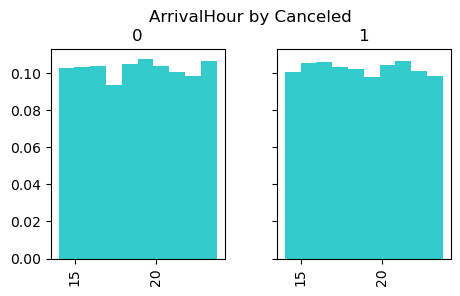

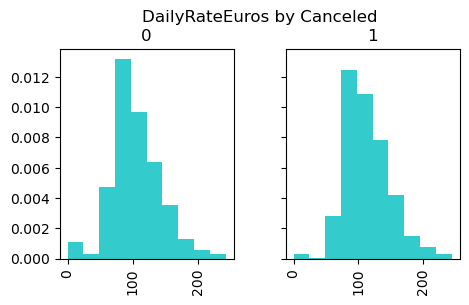

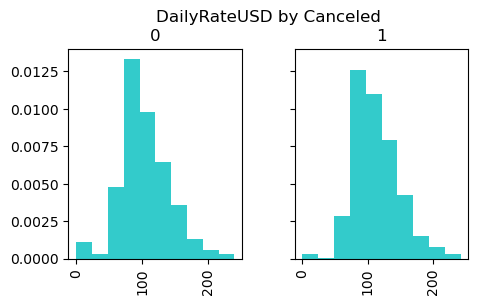

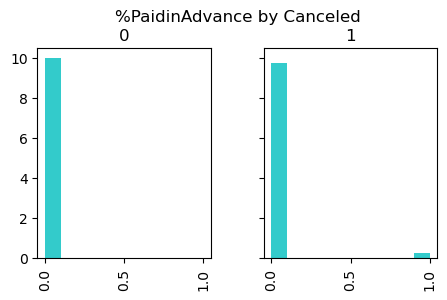

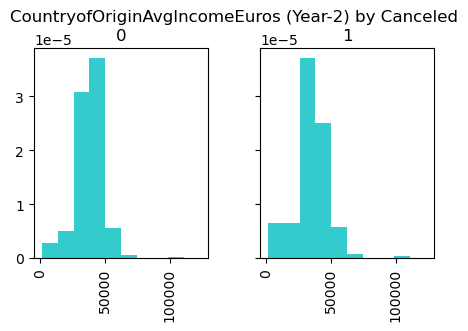

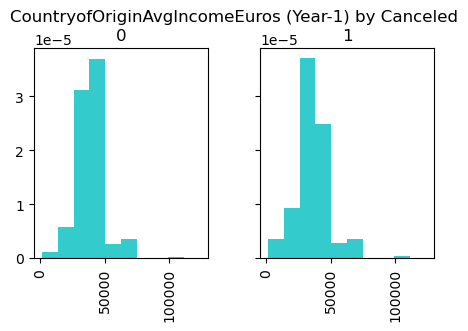

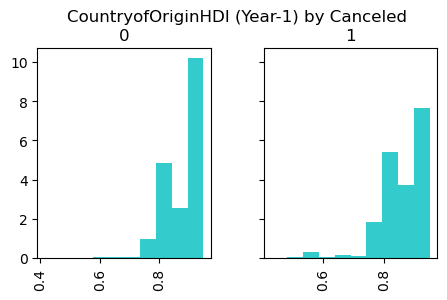

In [15]:
for i in features_continuous:
    data_train[i].hist(by=data_train["Canceled"], alpha=0.8, color="c", grid=True, figsize=(5, 3), sharey=True, density=True)
    plt.suptitle(f"{i} by Canceled")
    plt.subplots_adjust(top=0.85)

> Here we compare the feature _Canceled_ with series of other features. Analyzing these graphics we can conclude that the feature _Canceled_ almost doesn't affect these other features, as the proportion when _Canceled_ is 0 and when it is 1 almost doesn't change. 

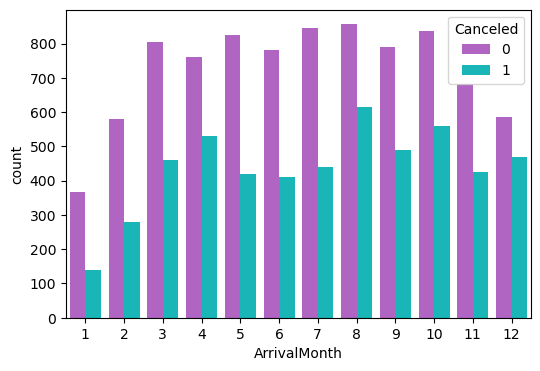

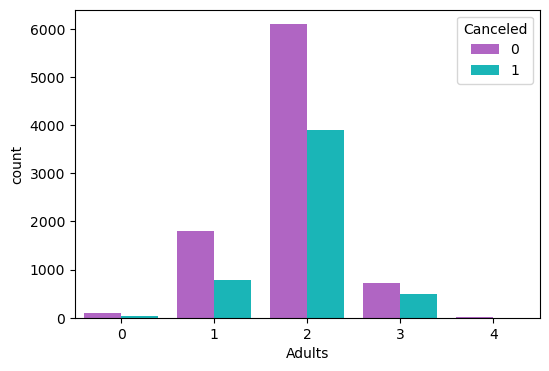

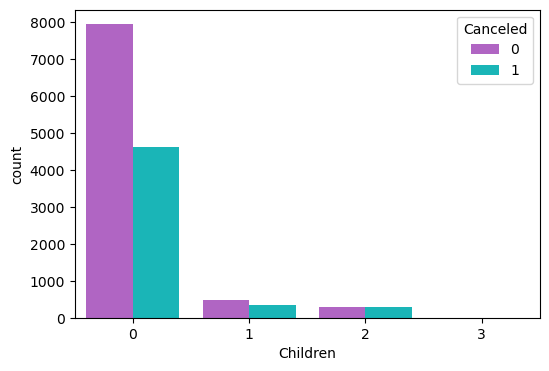

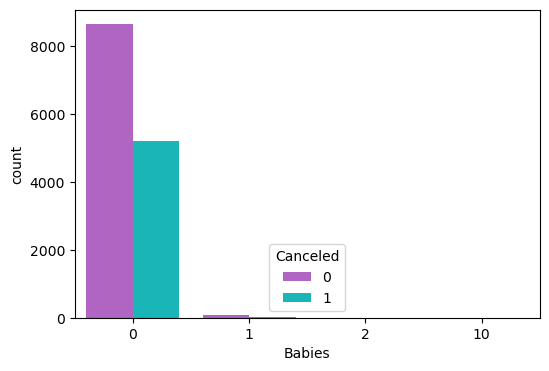

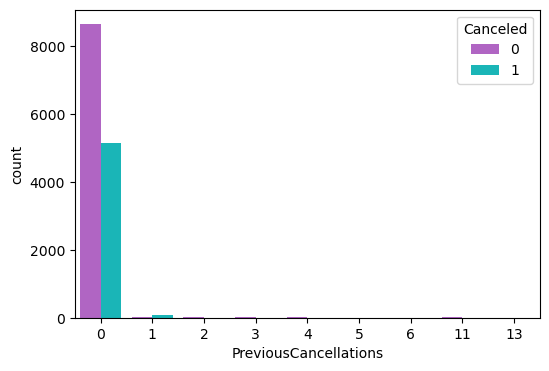

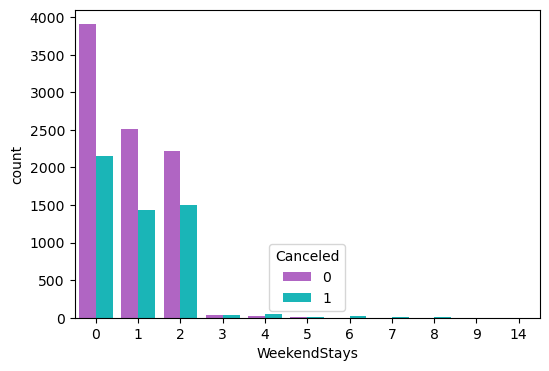

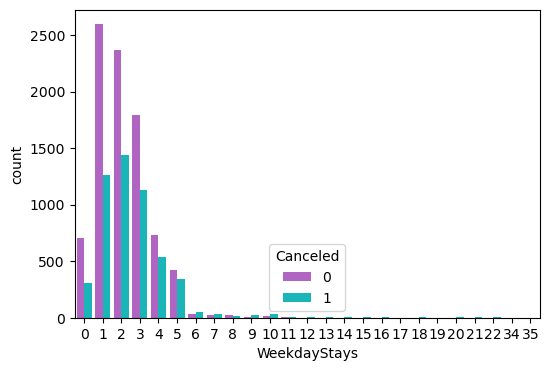

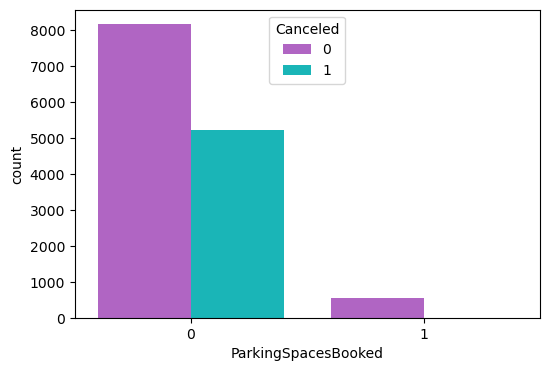

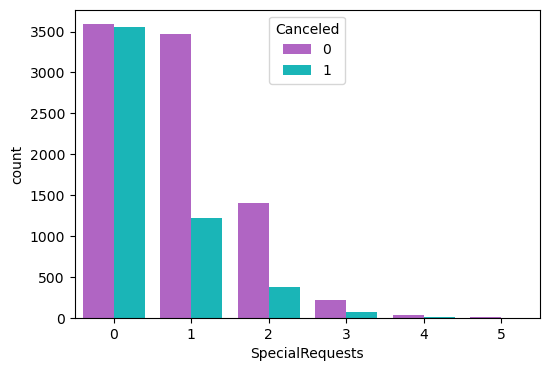

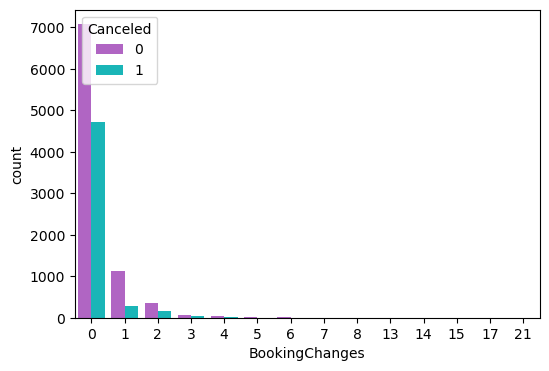

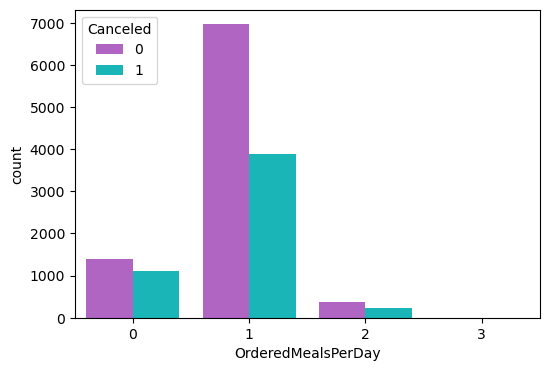

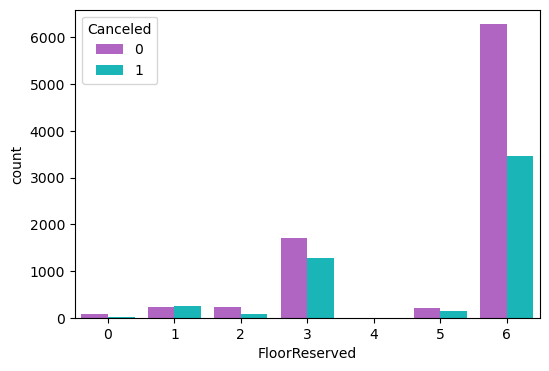

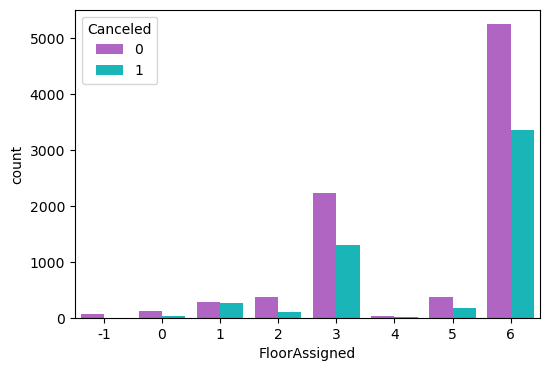

In [16]:
for feature in features_discrete_1:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = feature, data = data_train, hue = 'Canceled',  palette = ['mediumorchid','darkturquoise'])

> In this step, we compare the feature _Canceled_ with the features _ArrivalMonth_, _Adults_, _Children_, _Babies_, _PreviousCancellations_, _WeekendStays_, _WeekdayStays_, _ParkingSpacesBooked_, _SpecialRequestes_, _BookingChanges_, _OrderedMealsPerDay_, _FloorReserved_, and _FloorAssigned_. <br>
    - In the first graphic, we can conclude that every month the number of people that canceled the reservation is greater than the number of people that didn't do it, also the number of reservations is smaller in January, February, and December, but don't really vary in the rest of the year.<br>
    - Analysing the second graphic it is clear that normally the reservations are done by two adults and that the number of reservations canceled is smaller than the number of not canceled ones independently of the number of adults.<br>
    - When looking at the third graphic we can clearly see that almost all the reservations are made by people that don't bring children, we can also see that the number of canceled and not canceled reservations is almost the same when the number of children is two.<br>
    - In the fourth graphic we can see that almost all the reservations are done with no babies and the number of reservations with babies is so low that can be considered irrelevant.<br>
    - We come to the conclusion that almost anyone has previous cancelations, by looking at the fifth graphic.<br>
    - In the sixth graphic we can see that most users don't stay more than two weekend nights. <br>
    - Looking that the seventh graphic we can conclude that most customers don't do reservations of more than five weeknights.<br>
    - With the eighth graphic, we see that most users do not book a parking space.<br>
    - Analysing the ninth graphic we conclude that most users don't ask for more than one special request.<br>
    - In the tenth graphic we can see that most customers do not do booking changes. <br>
    - In the eleventh graphic we can clearly conclude that most users do only one meal order per day.<br>
    - Looking at the twelfth graphic we see that most customers intend to stay in a room on the sixth floor.<br>
    - Finally in the last graphic we conclude that most users are assigned a room on the sixth floor. <br>


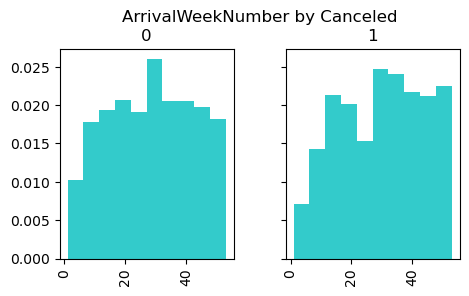

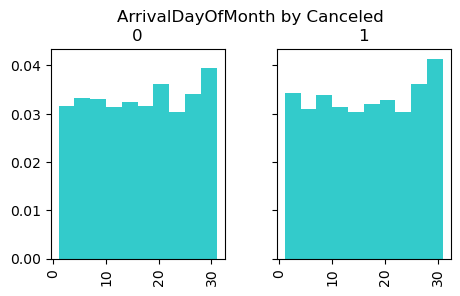

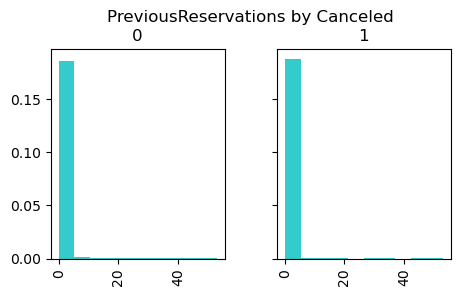

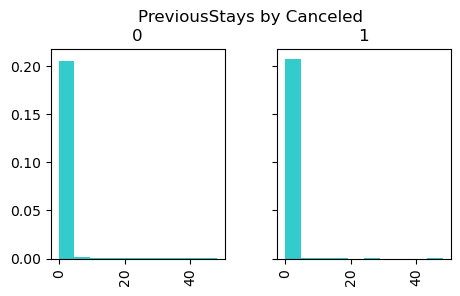

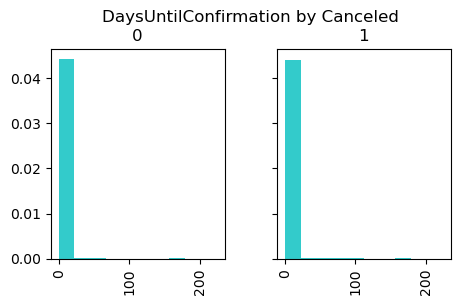

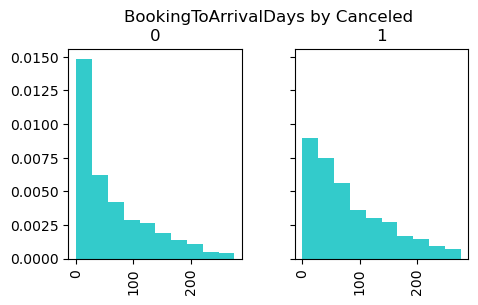

In [17]:
for i in features_discrete_2:
    data_train[i].hist(by=data_train["Canceled"], alpha=0.8, color="c", grid=True, figsize=(5, 3), sharey=True, density=True)
    plt.suptitle(f"{i} by Canceled")
    plt.subplots_adjust(top=0.85)

> Here we used once more the feature _Canceled_ and compared it with the features _ArrivalWeekNumber_, _ArrivalDayOfMonth_, _PreviousReservations_, _PreviousStays_, _DaysUntilConfirmation_, and _BookingToArrivalDays_. We conclude by looking at these graphics that the variable _Canceled_ barely affects the other features. This said we can see a bit of change in the features _ArrivalWeekNumber_ and _BookingToArrivalDays_.


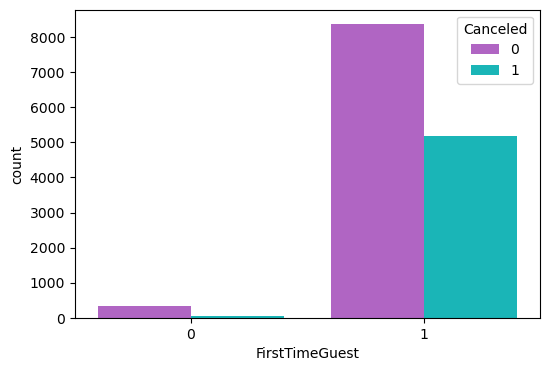

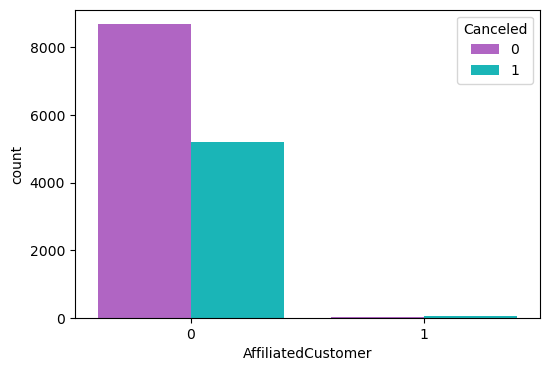

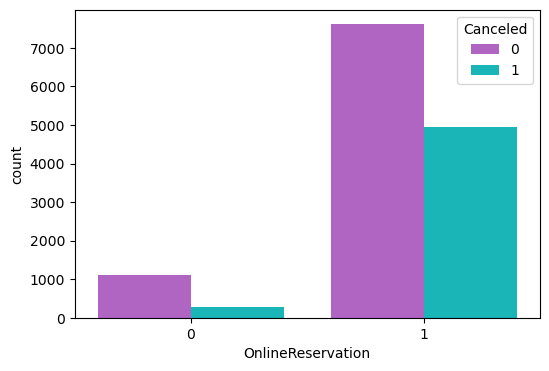

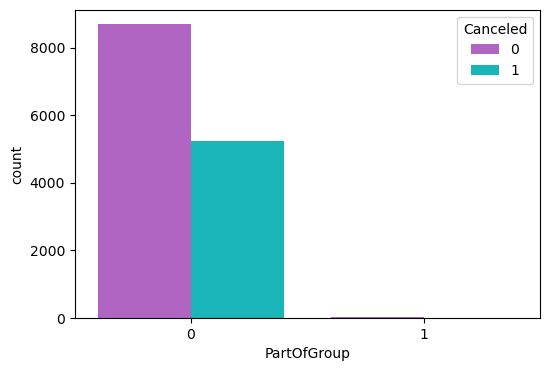

In [18]:
for feature in features_categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = feature, data = data_train, hue = 'Canceled',  palette = ['mediumorchid','darkturquoise'])

> Here we compared the feature _Canceled_ with the features _FirstTimeGuest_, _AffiliatedCustomer_, _OnlineReservation_, _PartOfGroup_. <br>
    - In the first graphic we can see that almost all reservations are the first reservation made by the customer. <br>
    - In the second one we can conclude that almost all reservations are made by customers that are not affiliated with the hotel.<br>
    - In the third graphic we conclude that almost all reservations are made online.<br>
    - Finally in the last graphic we can see that almost all reservations are not associated with other reservations.

#  **<h3 align="center">Test dataset </h3>** <a class="anchor" id="chapter3"></a>

## Import the dataset <a class="anchor" id="section_3_1"></a>

In [19]:
data_test_original = pd.read_csv('test.csv')
data_test_original.head(3)

,BookingID,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,...,CompanyReservation,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
0,22924,2016,12,50,8,20.00,0,1,1,0.0,...,1,1,6,6,67.0,66.33,0.0,28742.44,29668.86,0.842
1,18452,2016,7,31,29,19.25,0,1,2,0.0,...,1,0,6,6,109.0,107.91,0.0,1291.75,1354.39,0.432
2,27761,2016,10,41,4,20.75,0,2,2,1.0,...,1,1,6,3,169.0,167.31,0.0,36194.87,36909.33,0.876


In [20]:
data_test=data_test_original.copy()

In [21]:
data_test.set_index(['BookingID'], inplace = True)

## Data explore <a class="anchor" id="section_3_2"></a>

As we did the data explore for the train dataset we will do the same for the test dataset. <br>
The <span style='color:Blue'> info()  </span> method prints information about the data frame. Using this method we can also see that there aren't any missing values. And check the data types. <BR>
Analyzing the data types we consider that the features _Children_ must be an integer instead of float.

In [22]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 22924 to 33841
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ArrivalYear                             5974 non-null   int64  
 1   ArrivalMonth                            5974 non-null   int64  
 2   ArrivalWeekNumber                       5974 non-null   int64  
 3   ArrivalDayOfMonth                       5974 non-null   int64  
 4   ArrivalHour                             5974 non-null   float64
 5   WeekendStays                            5974 non-null   int64  
 6   WeekdayStays                            5974 non-null   int64  
 7   Adults                                  5974 non-null   int64  
 8   Children                                5974 non-null   float64
 9   Babies                                  5974 non-null   int64  
 10  FirstTimeGuest                          5974 non-null  

In [23]:
data_test['Children']=data_test['Children'].astype('int64')

Check if exists any variable that has missing values- after running the command we can conclude that there are no missing values.


In [24]:
data_test.isnull().sum()

ArrivalYear                               0
ArrivalMonth                              0
ArrivalWeekNumber                         0
ArrivalDayOfMonth                         0
ArrivalHour                               0
WeekendStays                              0
WeekdayStays                              0
Adults                                    0
Children                                  0
Babies                                    0
FirstTimeGuest                            0
AffiliatedCustomer                        0
PreviousReservations                      0
PreviousStays                             0
PreviousCancellations                     0
DaysUntilConfirmation                     0
OnlineReservation                         0
BookingChanges                            0
BookingToArrivalDays                      0
ParkingSpacesBooked                       0
SpecialRequests                           0
PartOfGroup                               0
CompanyReservation              

The <span style='color:Blue'> shape() </span> method is used to check how many rows and columns our dataset has at the beginning.

In [25]:
data_test.shape

(5974, 32)

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [26]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ArrivalYear,5974.0,2016.000000,0.000000,2016.000,2016.000000,2016.00000,2016.000,2016.0000
ArrivalMonth,5974.0,6.848845,3.180767,1.000,4.000000,7.00000,9.000,12.0000
ArrivalWeekNumber,5974.0,28.825410,13.890828,1.000,17.000000,29.00000,40.000,53.0000
ArrivalDayOfMonth,5974.0,15.893539,8.902304,1.000,8.000000,16.00000,24.000,31.0000
ArrivalHour,5974.0,18.825201,2.846332,14.000,16.500000,18.75000,21.250,23.7500
WeekendStays,5974.0,0.906428,0.936158,0.000,0.000000,1.00000,2.000,16.0000
WeekdayStays,5974.0,2.259960,1.717114,0.000,1.000000,2.00000,3.000,41.0000
Adults,5974.0,1.877971,0.555333,0.000,2.000000,2.00000,2.000,4.0000
Children,5974.0,0.138433,0.448693,0.000,0.000000,0.00000,0.000,3.0000
Babies,5974.0,0.006696,0.081560,0.000,0.000000,0.00000,0.000,1.0000


The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). <br>
The feature _ArrivalYear_ and _CompanyReservation_ are univariate so we remove that variable from the test dataset.

In [27]:
data_test.var() #bug

ArrivalYear                               5.170744e-26
ArrivalMonth                              1.011728e+01
ArrivalWeekNumber                         1.929551e+02
ArrivalDayOfMonth                         7.925101e+01
ArrivalHour                               8.101608e+00
WeekendStays                              8.763926e-01
WeekdayStays                              2.948482e+00
Adults                                    3.083946e-01
Children                                  2.013253e-01
Babies                                    6.651963e-03
FirstTimeGuest                            3.283140e-02
AffiliatedCustomer                        5.163090e-03
PreviousReservations                      7.039112e+00
PreviousStays                             5.745705e+00
PreviousCancellations                     2.069939e-01
DaysUntilConfirmation                     9.965686e+01
OnlineReservation                         9.316035e-02
BookingChanges                            4.898475e-01
BookingToA

In [28]:
data_test['ArrivalYear'].value_counts()

2016    5974
Name: ArrivalYear, dtype: int64

In [29]:
data_test['ArrivalYear'].var()

0.0

In [30]:
data_test=data_test.drop(['CompanyReservation','ArrivalYear'], axis = 1)

# Feature Selection <a class="anchor" id="chapter4"></a>

To start with the feature selection we first need to split our train dataset into X and y. And then split into train and validation.

In [31]:
X= data_train.drop('Canceled',axis=1)
y=data_train.iloc[:,-1]

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  test_size = 0.2, 
                                                  random_state = 42,
                                                  stratify = y, 
                                                  shuffle = True)

 ## <b>1. Selecting Numeric Features</b> <a class="anchor" id="section_4_1"></a>

 > ### Scale the data <a class="anchor" id="sub_section_4_1_1"></a>

In [33]:
#scaling features
feat_scaler = RobustScaler()
X_train[features_numerical] = feat_scaler.fit_transform(X_train[features_numerical])

#apply same transformation for test data
X_val[features_numerical] = feat_scaler.transform(X_val[features_numerical])

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

 We use the correlation matrix to summarize the correlations between all variables in a dataset and to see the relationship between the features to check whether they're strongly correlated or not. <br> Although ``Pearson's correlation`` is the most popular method of calculating correlations,  it alone is not sufficient for drawing a conclusion. ``Pearson's`` can be more sensitive towards outliers which may lead to a wrong conclusion depending on the data. <br> We use both to be able to see the relationships of the continuous and discrete variables but in this project, we will guide ourselves mostly with ``Spearman's`` since the correlation between variables is higher.

In [34]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

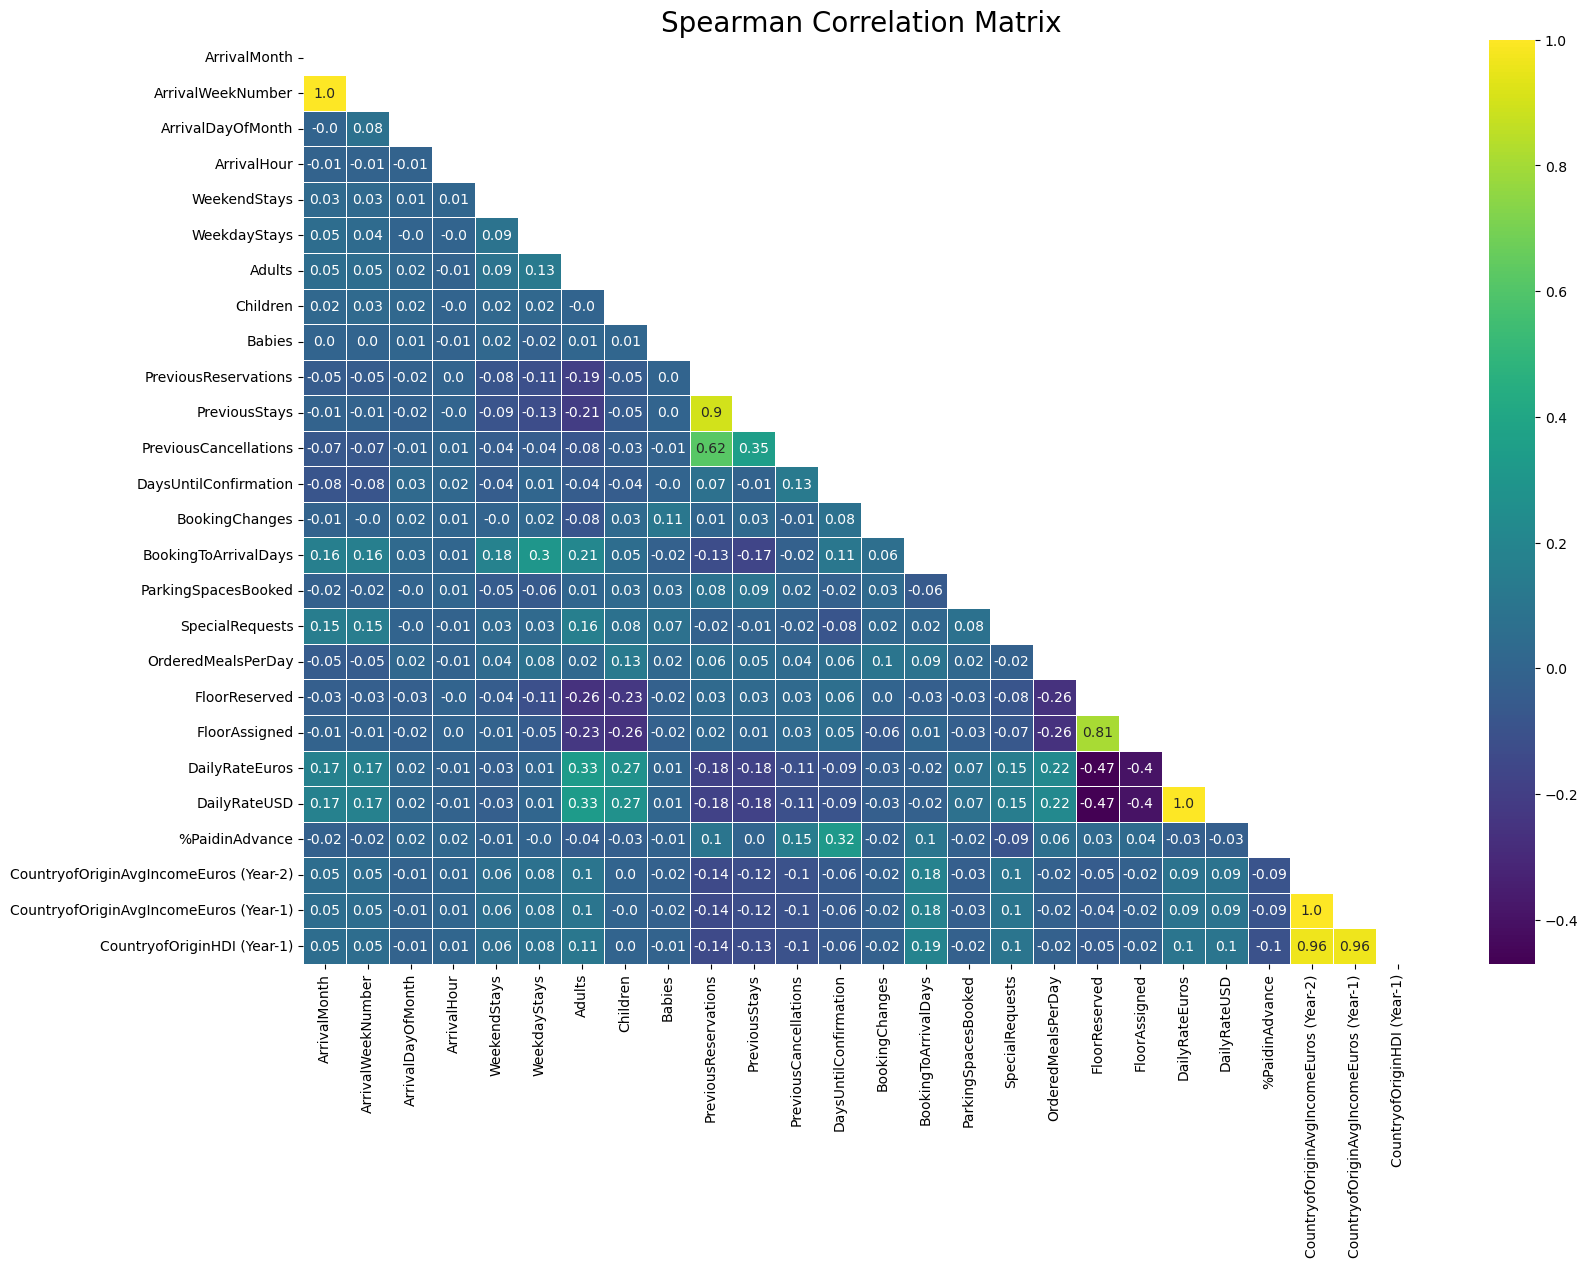

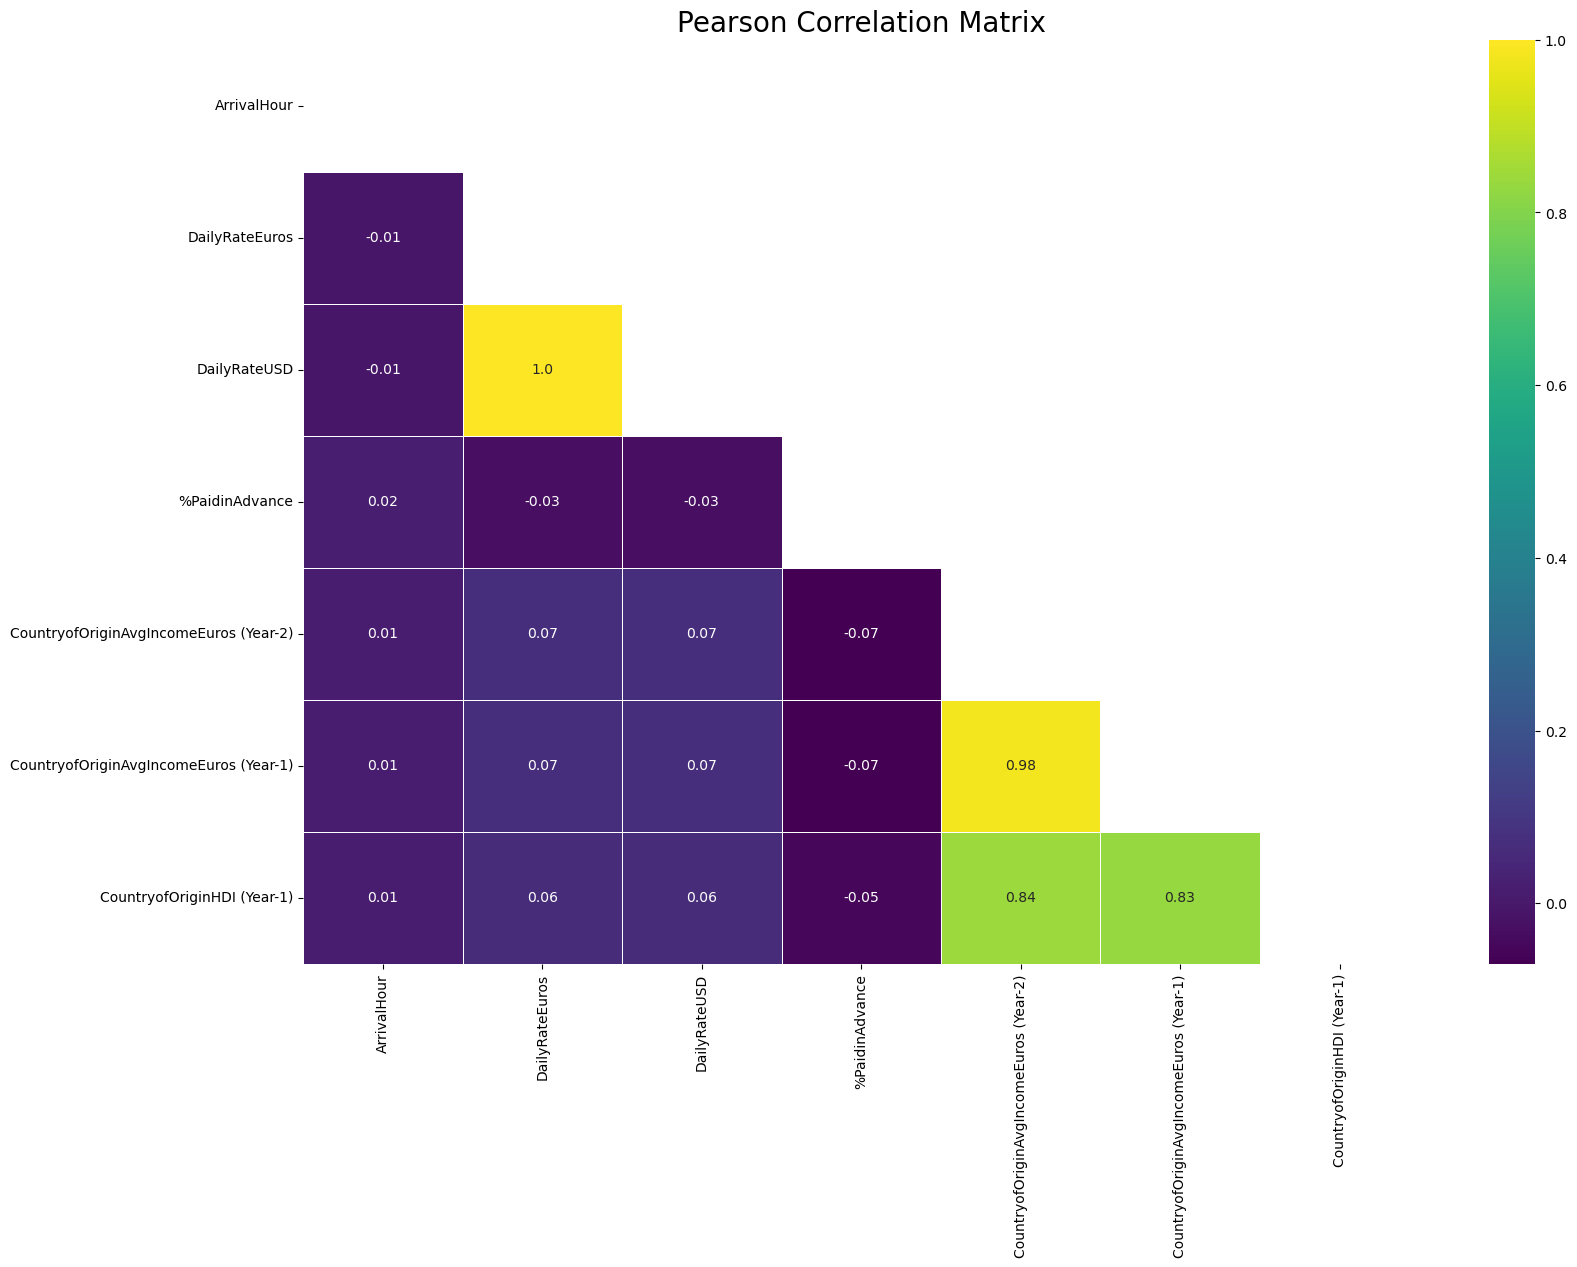

In [35]:
corr_data_numerical = data_train[features_numerical]
corr_data_continuous = data_train[features_continuous]
cor_spearman = corr_data_numerical.corr(method='spearman')
cor_pearson = corr_data_continuous.corr(method='pearson')

cor_heatmap(cor_spearman, 'Spearman')
cor_heatmap(cor_pearson, 'Pearson')

> In the ``Spearman correlation matrix`` we see that we have features with a high positive correlation, these being: _ArrivalWeekNumber_ with _ArrivalMonth_, _PreviousStays_ with _PreviousReservations_, _FloorAssigned_ with _FloorReserved_, _DailyRateUSD_ with _DailyRateEuros_, _CountryOfOriginAvgIncomeEuros (Year-1)_ with _CountryofOriginAvgIncomeEuros (Year-2)_, _CountryofOriginHDI (Year-1)_ with _CountryofOriginAvgIncomeEuros (Year-2)_ and _CountryofOriginHDI (Year-1)_ with _CountryOfOriginAvgIncomeEuros (Year-1)_. <br>
In the ``Pearson correlation matrix`` we also have feature with a high positive correlation, these being: _DailyRateUSD_ with _DailyRateEuros_, _CountryofOriginAvgIncomeEuros (Year-1)_ with _CountryofOriginAvgIncomeEuros (Year-2)_, _CountryofOriginHDI (Year-1)_ with _CountryofOriginAvgIncomeEuros (Year-2)_ and _CountryofOriginAvgIncomeEuros (Year-1)_ with _CountryofOriginHDI (Year-1)_.


 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

``Lasso regression`` is a regularization method. For a more accurate forecast, it is preferred over regression techniques. Shrinkage is used in this model. When data values shrink toward the mean, this is referred to as shrinkage. Simple, sparse models are encouraged by the lasso approach.

In [36]:
#fit regression
reg = LassoCV().fit(X_train[features_numerical], y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train[features_numerical].columns)
#obtain coef values
coef.sort_values()

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.570800199477844, tolerance: 0.2094596300448441
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3552272601752975, tolerance: 0.2094596300448441
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.504387996066498, tolerance: 0.20985102017937285
  model = cd_fast.enet_coordinate_descent_gram(


ParkingSpacesBooked                      -3.250281e-01
FloorReserved                            -1.702825e-01
SpecialRequests                          -1.453172e-01
CountryofOriginAvgIncomeEuros (Year-2)   -1.170771e-01
OrderedMealsPerDay                       -1.005236e-01
CountryofOriginHDI (Year-1)              -6.895741e-02
BookingChanges                           -4.184092e-02
ArrivalDayOfMonth                        -6.046348e-03
ArrivalHour                              -5.377509e-03
PreviousStays                            -3.743806e-03
ArrivalWeekNumber                        -1.111648e-03
DaysUntilConfirmation                    -8.566831e-04
PreviousReservations                     -0.000000e+00
Babies                                   -0.000000e+00
DailyRateUSD                              3.906861e-18
PreviousCancellations                     9.292102e-03
WeekendStays                              2.424726e-02
ArrivalMonth                              3.257162e-02
WeekdaySta

In [37]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

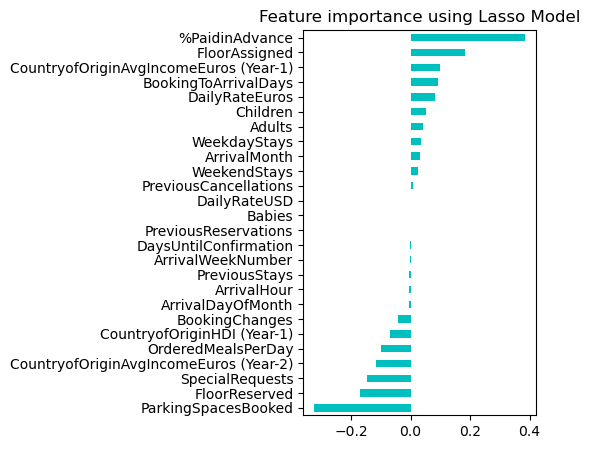

In [38]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

`RFE's` objective is to choose features by repeatedly taking into account smaller and smaller sets of features.<br>
The importance of each feature is first determined by training the estimator on the initial set of characteristics and then by any individual attribute or callable. The least crucial features are then removed from the present list of features. <br>
Once the appropriate number of features to pick has been reached, the technique is recursively repeated on the pruned set.

In [39]:
# Number of features
nof_list=np.arange(1,27)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train[features_numerical],y_train)
    X_val_rfe = rfe.transform(X_val[features_numerical])
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Optimum number of features: 25
Score with 25 features: 0.730273


C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [40]:
#rfscv- to select 1st the number of features we should select
rfe = RFE(estimator = model, n_features_to_select = 25)

In [41]:
X_rfe= rfe.fit_transform(X=X_train[features_numerical], y=y_train)

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [42]:
selected_features = pd.Series(rfe.support_, index = X_train[features_numerical].columns)
selected_features

ArrivalMonth                               True
ArrivalWeekNumber                          True
ArrivalDayOfMonth                          True
ArrivalHour                                True
WeekendStays                               True
WeekdayStays                               True
Adults                                     True
Children                                   True
Babies                                     True
PreviousReservations                       True
PreviousStays                              True
PreviousCancellations                      True
DaysUntilConfirmation                     False
BookingChanges                             True
BookingToArrivalDays                       True
ParkingSpacesBooked                        True
SpecialRequests                            True
OrderedMealsPerDay                         True
FloorReserved                              True
FloorAssigned                              True
DailyRateEuros                          

## <b>2. Selecting Categorical Features</b> <a class="anchor" id="section_4_2"></a>

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

For Chi Squared, we can only use categorical features, so here we're going to check the importance of the categorical independent variables.

In [43]:
#Chi-square test
threshold = 4 #we want to only keep the 4 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train[features_categorical],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train[features_categorical].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

In [44]:
feature_scores

array([ 3.18602175, 11.04168848, 16.77694838,  5.89740614])

In [45]:
scores

[16.776948383094982, 11.041688480829858, 5.897406143520163, 3.1860217514109364]

In [46]:
names_Chi2

['OnlineReservation', 'AffiliatedCustomer', 'PartOfGroup', 'FirstTimeGuest']

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

Mutual information has been employed as a criterion for feature selection and feature transformation. It can be used to describe variables' relevance and redundancy, such as the choice of the minimum redundancy feature.

In [47]:
 #MIC 
threshold = 4 #we want to only keep the 4 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train[features_categorical],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train[features_categorical].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [48]:
scores

[0.012994610434163834, 0.010030043750901996, 0.0, 0.0]

In [49]:
names_MIC

['OnlineReservation', 'FirstTimeGuest', 'PartOfGroup', 'AffiliatedCustomer']

> ###  Intersection of the features chosen by both models <a class="anchor" id="sub_section_4_2_3"></a>

In [50]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [51]:
features_selected

['AffiliatedCustomer', 'FirstTimeGuest', 'PartOfGroup', 'OnlineReservation']

## <b>3. Final Features</b> <a class="anchor" id="section_4_3"></a>


**Numerical Data**

| Predictor | Spearman | Lasso | RFE | What we decide to do?   |
| --- | --- | --- |--- |--- |
| ArrivalMonth | Discard | Keep | Keep | Keep |
| ArrivalWeekNumber  | Discard | Keep | Keep | <span style='color:Red'> Discard </span>|
| ArrivalDayOfMonth | Keep | Discard | Keep | Keep |
| ArrivalHour | Keep | Discard | Keep | <span style='color:Red'> Discard </span> |
| WeekendStays | Keep | Discard | Keep | <span style='color:Red'> Discard </span> |
| WeekdayStays | Keep | Keep |  Keep | Keep |
| Adults | Keep | Keep |  Keep | Keep |
| Children | Keep | Keep | Keep | Keep |
| Babies | Keep | Discard | Discard | <span style='color:Red'> Discard </span> |
| PreviousReservations | Discard | Discard | Keep | <span style='color:Red'> Discard </span> |
| PreviousStays | Discard | Keep | Keep | Keep |
| PreviousCancellations | Keep | Discard | Keep | <span style='color:Red'> Discard </span> |
| DaysUntilConfirmation | Keep | Discard | Keep | <span style='color:Red'> Discard </span> |
| BookingChanges | Keep | Keep | Keep | Keep |
| BookingToArrivalDays | Keep | Keep | Keep| Keep |
| ParkingSpacesBooked | Keep | Keep | Keep | Keep |
| SpecialRequests | Keep | Keep | Keep | Keep |
| OrderedMealsPerDay | Keep | Keep | Keep | Keep |
| FloorReserved | Discard | Keep | Keep | <span style='color:Red'> Discard </span> |
| FloorAssigned | Discard | Keep | Keep | Keep |
| BookingToArrivalDays | Keep | Keep | Keep | Keep |
| DailyRateEuros | Discard | Keep | Keep | Keep |
| DailyRateUSD | Discard | Discard | Keep | <span style='color:Red'> Discard </span> |
| %PaidinAdvance | Keep | Keep | Keep | Keep |
| CountryofOriginAvgIncomeEuros (Year-2) | Discard | Keep | Keep | <span style='color:Red'> Discard </span> |
| CountryofOriginAvgIncomeEuros (Year-1) | Discard | Keep | Keep | Keep |
| CountryofOriginHDI (Year-1) | Discard | Keep | Keep | <span style='color:Red'> Discard </span> |

<hr>


**Categorical Data**

| Predictor | F-Chi2 | MIC | What we decide to do?   |
| --- | --- | --- | --- |  
| FirstTimeGuest | Keep | Keep | Keep  |
| AffiliatedCustomer | Keep | Discard | <span style='color:Red'> Discard </span> |
| OnlineReservation | Keep | Keep | Keep | 
| PartOfGroup | Keep | Keep | Keep |

<hr>



In [53]:
train_feat_sel = X_train.drop(['ArrivalWeekNumber', 'ArrivalHour', 'WeekendStays', 'Babies', 'PreviousReservations', 
                               'PreviousCancellations', 'DaysUntilConfirmation', 'FloorReserved', 'DailyRateUSD', 
                               'CountryofOriginAvgIncomeEuros (Year-2)', 'CountryofOriginHDI (Year-1)', 
                               'AffiliatedCustomer'], axis = 1)
val_feat_sel = X_val.drop(['ArrivalWeekNumber', 'ArrivalHour', 'WeekendStays', 'Babies', 'PreviousReservations', 
                               'PreviousCancellations', 'DaysUntilConfirmation', 'FloorReserved', 'DailyRateUSD', 
                               'CountryofOriginAvgIncomeEuros (Year-2)', 'CountryofOriginHDI (Year-1)', 
                               'AffiliatedCustomer'], axis = 1)

# Random Forest Classifier <a class="anchor" id="chapter5"></a> 


To build the predictive model we will use the **Random Forest Classifier**. A Random Forest is a meta-estimator that employs averaging to increase predicted accuracy and reduce overfitting after fitting numerous decision tree classifiers to distinct dataset subsamples.

In [109]:
def return_results(models, X = train_feat_sel, y = y_train):
    results, names = [],[]
    for name, model in tqdm(models.items()):
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

In [110]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [111]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 42)

In the next cell, through the function <span style='color:Blue'> get_models()  </span>, we will evaluate the f1 score for different parameter values. The parameter that is being evaluated is the `n_estimators` and the values checked are 50, 100, 200, 300, 500, and 1000. In this function, we also plot the boxplots assessing their mean and standard deviation of the f1 score for all values.

  0%|          | 0/6 [00:00<?, ?it/s]

>50 0.675 (0.019)
>100 0.678 (0.019)
>200 0.681 (0.018)
>300 0.683 (0.018)
>500 0.683 (0.018)
>1000 0.684 (0.018)


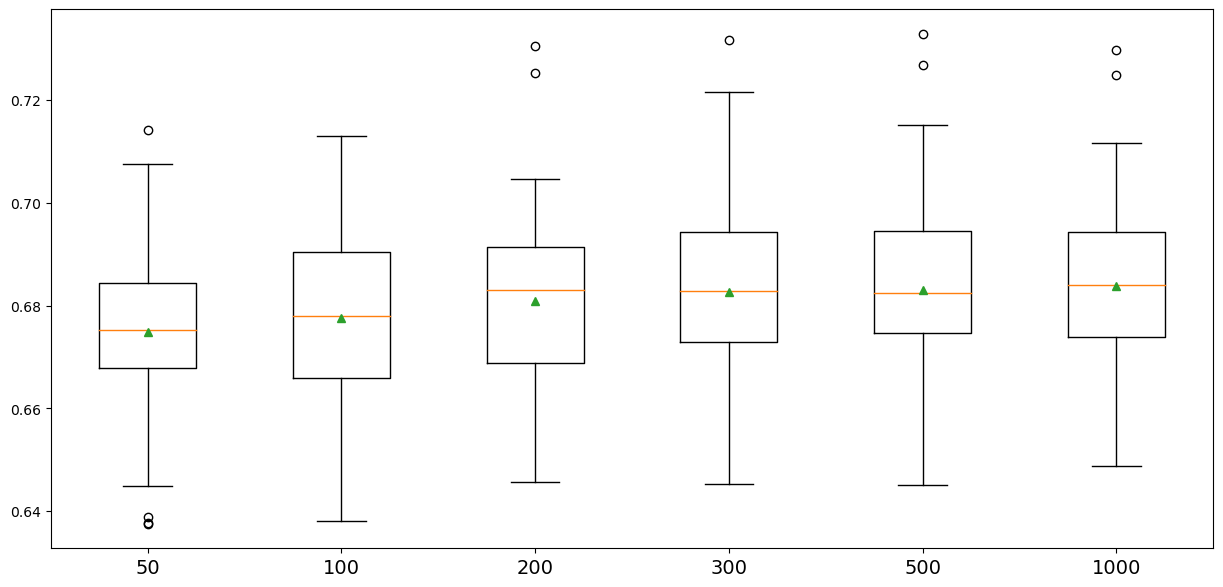

In [112]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 5)      
    return models

models = get_models([50,100,200,300,500,1000])
return_results(models)

Now we will use the  <span style='color:Blue'> get_models()  </span> function again to gain the same insights but for the `bootstrap` parameter with True and False as values.

  0%|          | 0/2 [00:00<?, ?it/s]

>True 0.678 (0.019)
>False 0.681 (0.017)


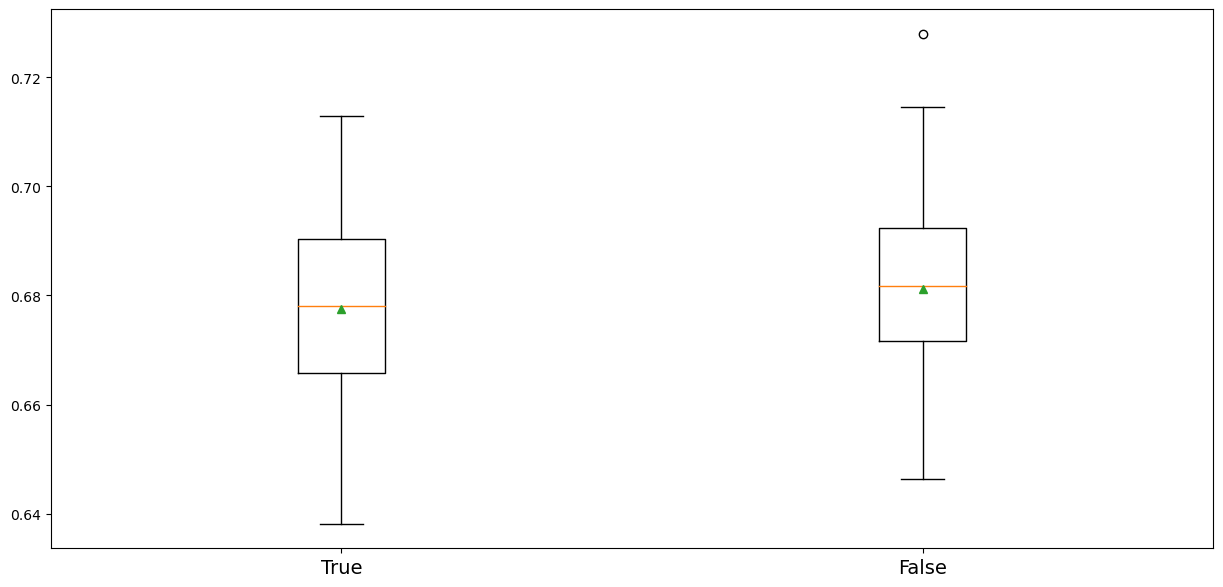

In [113]:
def get_models(values):      
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 5)      
    return models

models = get_models([True, False])
return_results(models)

This time with `max_samples` as parameter to be evaluated and 0.2, 0.4, 0.6, 0.8 and None as parameter values.

  0%|          | 0/5 [00:00<?, ?it/s]

>0.2 0.658 (0.019)
>0.4 0.670 (0.017)
>0.6 0.675 (0.017)
>0.8 0.678 (0.017)
>None 0.678 (0.019)


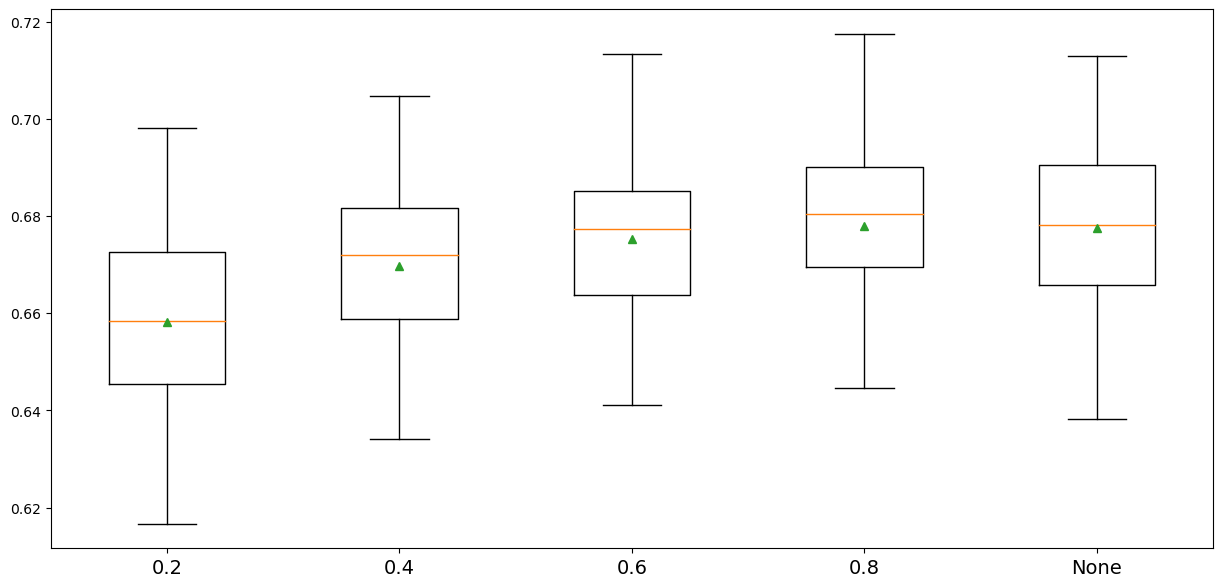

In [114]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_samples = value, random_state = 5)      
    return models

models = get_models([0.2,0.4,0.6,0.8,None])
return_results(models)

Checking now the parameter values 8, 10, 12, 15, 20, and None for `max_depth` parameter.

  0%|          | 0/6 [00:00<?, ?it/s]

>8 0.622 (0.019)
>10 0.641 (0.019)
>12 0.656 (0.016)
>15 0.672 (0.015)
>20 0.683 (0.017)
>None 0.678 (0.019)


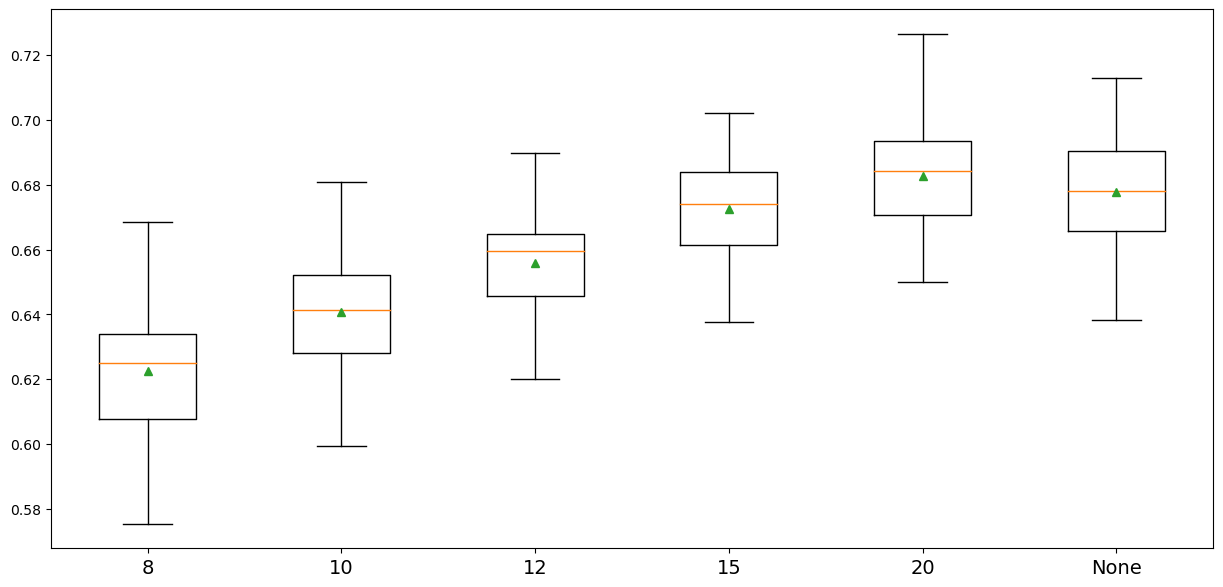

In [115]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 5)      
    return models

models = get_models([8,10,12,15,20,None])
return_results(models)

And finally we evaluated the f1 score of the `min_samples_leaf` parameter for the values 1, 5, 10 and 15.

  0%|          | 0/4 [00:00<?, ?it/s]

>1 0.678 (0.019)
>5 0.662 (0.019)
>10 0.647 (0.018)
>15 0.637 (0.016)


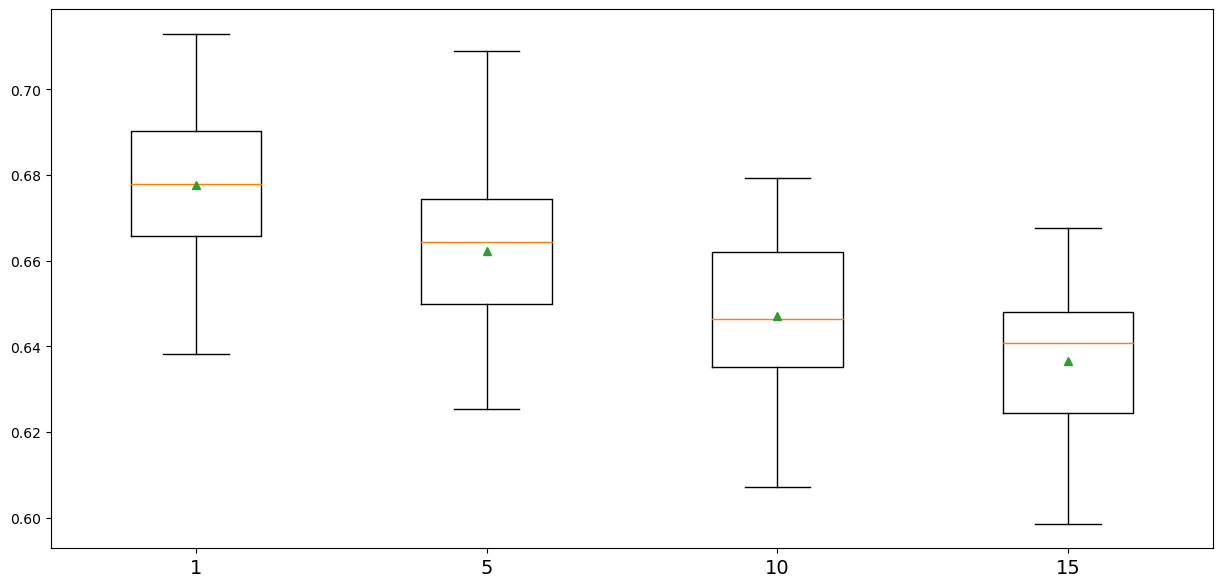

In [116]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(min_samples_leaf = value, random_state = 5)      
    return models

models = get_models([1,5,10,15])
return_results(models)

## Grid Search for hyperparameters <a class="anchor" id="section_5_1"></a>

The Grid Search tuning method is used to adjust the hyperparameters of the Random Forest Classifier. In this case, we decided to use the best three estimators of each parameter that we study through the f1 score get by the boxplots.

In [54]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print('accuracy score = ',accuracy_score(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print('accuracy score = ',accuracy_score(y_val, pred_val))

In [118]:
parameter_space = {
    'n_estimators': [300,500,1000],
    'bootstrap': [True, False],
    'max_samples': [0.6, 0.8, None],
    'max_depth': [15,20,None],
    'min_samples_leaf':[1,5,10]
}

In [119]:
modelRFC=RandomForestClassifier().fit(train_feat_sel, y_train)

In [120]:
clf = GridSearchCV(modelRFC, parameter_space, scoring = 'f1')

In [121]:
clf.fit(train_feat_sel, y_train)

C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alexandra\anaconda3\envs\machine learning\lib\site-packages\sklearn\ensemble\_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [15, 20, None],
                         'max_samples': [0.6, 0.8, None],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [300, 500, 1000]},
             scoring='f1')

In [122]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_samples': None,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [123]:
#Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

#All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'bootstrap': False, 'max_depth': 20, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 300}
------------------------------------------------------------------------------------------------------------------------
0.664 (+/-0.013) for {'bootstrap': True, 'max_depth': 15, 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 300}
0.659 (+/-0.015) for {'bootstrap': True, 'max_depth': 15, 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 500}
0.663 (+/-0.012) for {'bootstrap': True, 'max_depth': 15, 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 1000}
0.651 (+/-0.018) for {'bootstrap': True, 'max_depth': 15, 'max_samples': 0.6, 'min_samples_leaf': 5, 'n_estimators': 300}
0.650 (+/-0.017) for {'bootstrap': True, 'max_depth': 15, 'max_samples': 0.6, 'min_samples_leaf': 5, 'n_estimators': 500}
0.647 (+/-0.017) for

In [124]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_samples': None,
 'min_samples_leaf': 1,
 'n_estimators': 300}

Now we create a model using the best estimatores given by the GridSearch.

In [55]:
model_best_overfit= RandomForestClassifier(n_estimators= 500,
    bootstrap= False,
    max_samples= None,
    max_depth= 20,
    min_samples_leaf= 1, random_state=5).fit(train_feat_sel, y_train)

In [56]:
label_best_overfit = model_best_overfit.predict(train_feat_sel)
label_best_overfit_val= model_best_overfit.predict(val_feat_sel)

In [57]:
print('                                 Random Forest Classifier with Overfit')
metrics(y_train, label_best_overfit, y_val, label_best_overfit_val)

                                 Random Forest Classifier with Overfit
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
accuracy score =  0.9842152466367713
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
accuracy score =  0.7855093256814921


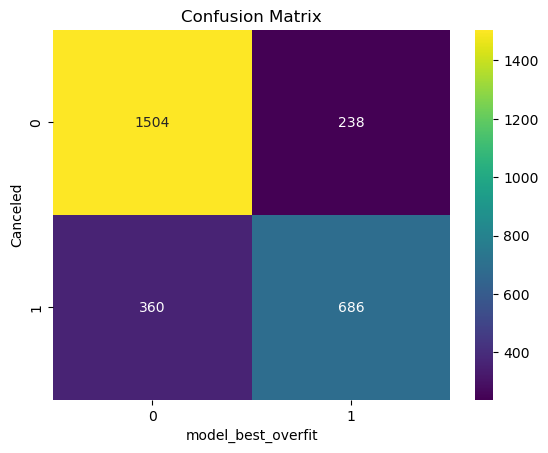

<Figure size 400x400 with 0 Axes>

In [62]:
ax= plt.subplot()
model_best_matrix=confusion_matrix(y_val, label_best_overfit_val)
plt.figure(figsize = (4,4))
sns.heatmap(model_best_matrix, annot=True, fmt='g', ax=ax, cmap='viridis');

# labels, title and ticks
ax.set_xlabel('model_best_overfit');ax.set_ylabel('Canceled'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [63]:
sensitivity_of_model_best = model_best_matrix[0,0]/(model_best_matrix[0,0]+model_best_matrix[0,1])
print('Sensitivity : ', sensitivity_of_model_best)

specificity_of_model_best = model_best_matrix[1,1]/(model_best_matrix[1,0]+model_best_matrix[1,1])
print('Specificity : ', specificity_of_model_best)

Sensitivity :  0.8633754305396096
Specificity :  0.655831739961759


## Final Model <a class="anchor" id="section_5_2"></a>

Despite the Grid Search telling us that those estimators perform the best f1 score, this model presents us with overfitting. So through some research, we decided to change the `criterion`, `min_samples_leaf`, `max_features`, and `warm_start` to get a model without overfitting and with a good performance. Although the score is a little bit lower that the model_best we decided to keep the **modelRFC** as our final model.
<br>
The `criterion` parameter determines how the impurity of a split will be measured. In the following model, the criteria are defined by the 'entropy' which is characterized by a unit of measurement for information that depicts the disorder of the target's characteristics. The feature with the lowest entropy selects the optimal split, just like the Gini Index does.<br>
Increasing the `min_samples_leaf` we get able to decrease the overfitting. This parameter is the minimum number of samples required to be at a leaf node. <br>
The `max_features` parameter is to determine how many characteristics should be considered to produce the optimum split. In this case, we change the max_features=log2(features). <br>
When the `warm_start` option is set to True, the ensemble of estimators is expanded and the previous call's solution is reused.

In [65]:
modelRFC = RandomForestClassifier(criterion='entropy', 
                                    n_estimators = 500, 
                                    bootstrap = False, 
                                    max_depth= 20, 
                                    max_samples= None, 
                                    random_state=5, 
                                    min_samples_leaf=15, 
                                    max_features='log2', 
                                    warm_start=True).fit(train_feat_sel, y_train)

In [66]:
label_RFC = modelRFC.predict(train_feat_sel)
label_RFC_val= modelRFC.predict(val_feat_sel)

In [67]:
print('                                        Random Forest Classifier Treated')
metrics(y_train, label_RFC, y_val, label_RFC_val)

                                        Random Forest Classifier Treated
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
accuracy score =  0.8175784753363229
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
accuracy score =  0.7797704447632712


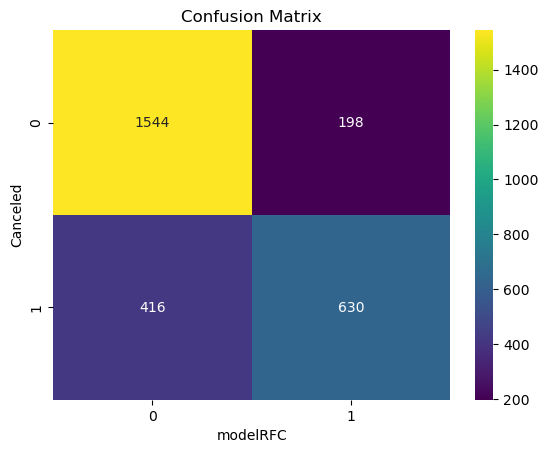

<Figure size 400x400 with 0 Axes>

In [68]:
ax= plt.subplot()
modelRFC_matrix=confusion_matrix(y_val, label_RFC_val)
plt.figure(figsize = (4,4))
sns.heatmap(modelRFC_matrix, annot=True, fmt='g', ax=ax, cmap='viridis');

# labels, title and ticks
ax.set_xlabel('modelRFC');ax.set_ylabel('Canceled'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [69]:
sensitivity_of_modelRFC = modelRFC_matrix[0,0]/(modelRFC_matrix[0,0]+modelRFC_matrix[0,1])
print('Sensitivity : ', sensitivity_of_modelRFC)

specificity_of_modelRFC = modelRFC_matrix[1,1]/(modelRFC_matrix[1,0]+modelRFC_matrix[1,1])
print('Specificity : ', specificity_of_modelRFC)

Sensitivity :  0.886337543053961
Specificity :  0.6022944550669216


<b>Note:</b> <br>
Sensitivity is the true positive rate.<br>
(TP) / (TP+FN) <br>
Specificity is the true negative rate.<br> 
(TN) / (TN+FP)

# Import the submission file <a class="anchor" id="chapter6"></a> 


In this last section, we will feat the data_test with the same scaler we used in data_train. It is important to refer that the robust scaler was the scale that gave us the best performance. Also, we will drop the features eliminated through the feature selection.

In [219]:
feat_scaler = RobustScaler()
data_test[features_numerical] = feat_scaler.fit_transform(data_test[features_numerical])

In [220]:
data_test=data_test.drop(['ArrivalWeekNumber', 'ArrivalHour', 'WeekendStays', 'Babies', 'PreviousReservations', 
                               'PreviousCancellations', 'DaysUntilConfirmation', 'FloorReserved', 'DailyRateUSD', 
                               'CountryofOriginAvgIncomeEuros (Year-2)', 'CountryofOriginHDI (Year-1)', 
                               'AffiliatedCustomer'], axis = 1)

Using the model selected (**ModelRFC**) in the previous section we will make the prediction of the target in the data_test.

In [221]:
label_RFC_final = modelRFC.predict(data_test)
label_RFC_final

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [223]:
df = pd.DataFrame(label_RFC_final, columns=['Canceled']) 
df = df.set_index(y)

In [224]:
df

,Canceled
BookingID,
22924,0
18452,0
27761,1
25345,1
28561,1
...,...
39732,1
13512,1
13427,0


In [225]:
df['Canceled'].value_counts()

0    4195
1    1779
Name: Canceled, dtype: int64

Download the final csv to submit on kaggle.

In [226]:
df.to_csv('modelRFC_final.csv')